In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\23adsb61\Documents\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
# Prep features and target
X = df.drop(columns=['output'])
y = df['output']
print(X)
print(X.shape)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

In [11]:
print(y)
print(y.shape)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64
(303,)


In [12]:
unique_values = np.unique(y)
counts = np.zeros_like(unique_values)

for i, value in enumerate(unique_values):
  counts[i] = np.count_nonzero(y == value)

for i, value in enumerate(unique_values):
  print(f"Class label: {value}, Count: {counts[i]}")


Class label: 0, Count: 138
Class label: 1, Count: 165


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=0)

In [14]:
print(X_train)
print(X_train.shape)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
74    43    0   2     122   213    0        1       165     0      0.2    1   
153   66    0   2     146   278    0        0       152     0      0.0    1   
64    58    1   2     140   211    1        0       165     0      0.0    2   
296   63    0   0     124   197    0        1       136     1      0.0    1   
287   57    1   1     154   232    0        0       164     0      0.0    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
251   43    1   0     132   247    1        0       143     1      0.1    1   
192   54    1   0     120   188    0        1       113     0      1.4    1   
117   56    1   3     120   193    0        0       162     0      1.9    1   
47    47    1   2     138   257    0        0       156     0      0.0    2   
172   58    1   1     120   284    0        0       160     0      1.8    1   

     caa  thall  
74     0      2  
153    1      2

In [15]:
print(X_test)
print(X_test.shape)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
225   70    1   0     145   174    0        1       125     1      2.6    0   
152   64    1   3     170   227    0        0       155     0      0.6    1   
228   59    1   3     170   288    0        0       159     0      0.2    1   
201   60    1   0     125   258    0        0       141     1      2.8    1   
52    62    1   2     130   231    0        1       146     0      1.8    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
146   44    0   2     118   242    0        1       149     0      0.3    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
108   50    0   1     120   244    0        1       162     0      1.1    2   
89    58    0   0     100   248    0        0       122     0      1.0    1   

     caa  thall  
225    0      3  
152    0      3

In [16]:
print(y_train)
print(y_train.shape)

74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: output, Length: 242, dtype: int64
(242,)


In [17]:
print(y_test)
print(y_test.shape)

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: output, Length: 61, dtype: int64
(61,)


In [18]:
unique_values = np.unique(y_test)
counts = np.zeros_like(unique_values)

for i, value in enumerate(unique_values):
  counts[i] = np.count_nonzero(y_test == value)

for i, value in enumerate(unique_values):
  print(f"Class label: {value}, Count: {counts[i]}")


Class label: 0, Count: 27
Class label: 1, Count: 34


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[0.29166667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       [0.77083333, 0.        , 0.66666667, ..., 0.5       , 0.25      ,
        0.66666667],
       [0.60416667, 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.5625    , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.375     , 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.66666667]], shape=(242, 13))

In [21]:
X_test

array([[ 0.85416667,  1.        ,  0.        ,  0.52040816,  0.09930716,
         0.        ,  0.5       ,  0.41221374,  1.        ,  0.41935484,
         0.        ,  0.        ,  1.        ],
       [ 0.72916667,  1.        ,  1.        ,  0.7755102 ,  0.22170901,
         0.        ,  0.        ,  0.64122137,  0.        ,  0.09677419,
         0.5       ,  0.        ,  1.        ],
       [ 0.625     ,  1.        ,  1.        ,  0.7755102 ,  0.36258661,
         0.        ,  0.        ,  0.67175573,  0.        ,  0.03225806,
         0.5       ,  0.        ,  1.        ],
       [ 0.64583333,  1.        ,  0.        ,  0.31632653,  0.29330254,
         0.        ,  0.        ,  0.53435115,  1.        ,  0.4516129 ,
         0.5       ,  0.25      ,  1.        ],
       [ 0.6875    ,  1.        ,  0.66666667,  0.36734694,  0.23094688,
         0.        ,  0.5       ,  0.57251908,  0.        ,  0.29032258,
         0.5       ,  0.75      ,  1.        ],
       [ 0.39583333,  1.      

In [22]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve,roc_curve, auc, roc_auc_score
from sklearn.metrics import balanced_accuracy_score

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=100)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
# Predict on test set using fitted model
preds = rf_model.predict(X_test)

In [25]:
accuracy_score(y_test, preds)

0.8688524590163934

Confusion Matrix
[[23  4]
 [ 4 30]]


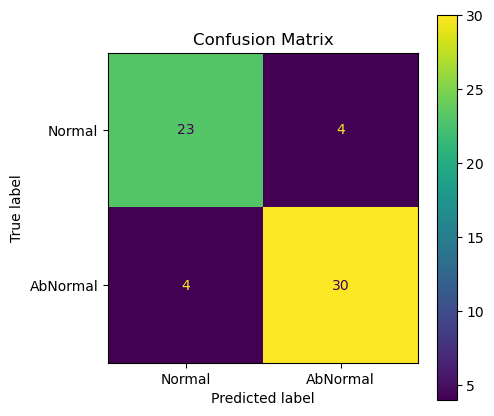

In [26]:
classes = ["Normal","AbNormal"]
cm = confusion_matrix(y_test,preds)

print('Confusion Matrix')
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [27]:
Accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy:', Accuracy*100)

Precision = metrics.precision_score(y_test, preds)
print('Precision:', Precision*100)

Recall = metrics.recall_score(y_test, preds)
print('Recall:', Recall*100)

F1_score = metrics.f1_score(y_test, preds)
print('F1 Score:', F1_score*100)

Accuracy: 86.88524590163934
Precision: 88.23529411764706
Recall: 88.23529411764706
F1 Score: 88.23529411764706


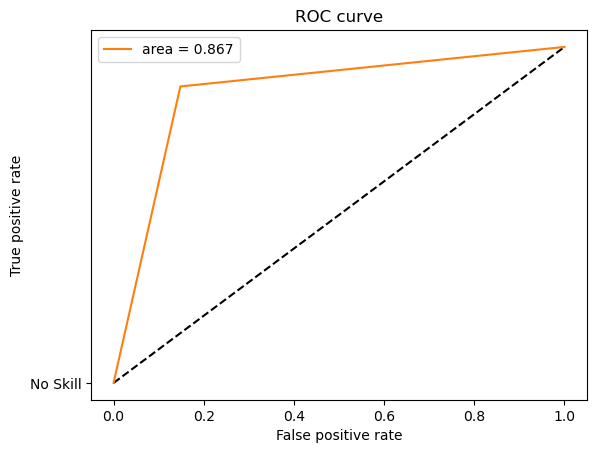

In [31]:
from sklearn.metrics import roc_curve,auc

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,preds)

auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--' ,'No Skill')
plt.plot(fpr_keras, tpr_keras, label = 'area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'best')
plt.show()